In [2]:
#Import the required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math 

In [2]:
#Read the dataset
df= pd.read_csv("HR+analytics+dataset.csv") 


In [3]:
# Check the data rows
df.head()

,Gender,Business,Age,Salary,Dependancies,Months,Calls,Type,Billing,Unit_Sales,Total_Sales,Rating,Bonus,BasePay,Unit_Price,Volume,openingbalance,closingbalance,low
0,Female,0,42,101348.88,No,1,No,Month-to-month,Yes,29.85,29.85,No,400184.25,167411.18,126.250000,2163600,123.430000,125.839996,122.309998
1,Male,0,41,112542.58,No,34,Yes,One year,No,56.95,1889.5,No,137811.38,155966.02,125.540001,2386400,125.239998,119.980003,119.940002
2,Male,0,42,113931.57,No,2,Yes,Month-to-month,Yes,53.85,108.15,Yes,16452.60,212739.13,119.739998,2489500,116.379997,114.949997,114.930000
3,Male,0,39,93826.63,No,45,No,One year,No,42.30,1840.75,No,198306.90,77916.00,117.440002,2006300,115.480003,116.620003,113.500000
4,Female,0,43,79084.10,No,2,Yes,Month-to-month,Yes,70.70,151.65,Yes,182234.59,134401.60,117.330002,1408600,117.010002,114.970001,114.089996


In [4]:
#get statistical info about the features
df.describe()

,Business,Age,Salary,Months,Unit_Sales,Bonus,BasePay,Unit_Price,Volume,openingbalance,closingbalance,low
count,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5.049000e+03,5049.000000,5049.000000,5049.000000
mean,0.160032,39.012280,100326.490008,32.217271,64.772103,12686.158334,125667.312171,51.224542,6.735758e+06,43.517670,43.581984,43.037421
std,0.366672,10.600392,57743.911455,24.625027,30.161810,16020.185731,27660.975992,52.061379,1.613986e+07,37.111517,37.074444,36.686894
min,0.000000,18.000000,11.580000,0.000000,18.250000,0.000000,0.000000,1.440000,0.000000e+00,3.680000,3.680000,3.650000
25%,0.000000,32.000000,50679.480000,9.000000,35.400000,3071.600000,105934.710000,25.760000,1.281700e+06,21.980000,22.024999,21.752501
50%,0.000000,37.000000,100601.730000,28.000000,70.400000,10114.010000,123105.000000,39.240002,2.864200e+06,33.299999,33.340000,32.930000
75%,0.000000,44.000000,149139.130000,55.000000,89.950000,17176.630000,138854.690000,58.590000,6.205100e+06,51.130001,51.209946,50.529999
max,1.000000,88.000000,199970.740000,72.000000,118.750000,400184.250000,294580.020000,629.511067,3.208684e+08,313.903904,313.688694,312.432438


In [5]:
#Check the basic info of the dataset , features and the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5049 non-null   object 
 1   Business        5049 non-null   int64  
 2   Age             5049 non-null   int64  
 3   Salary          5049 non-null   float64
 4   Dependancies    5049 non-null   object 
 5   Months          5049 non-null   int64  
 6   Calls           5049 non-null   object 
 7   Type            5049 non-null   object 
 8   Billing         5049 non-null   object 
 9   Unit_Sales      5049 non-null   float64
 10  Total_Sales     5049 non-null   object 
 11  Rating          5049 non-null   object 
 12  Bonus           5049 non-null   float64
 13  BasePay         5049 non-null   float64
 14  Unit_Price      5049 non-null   float64
 15  Volume          5049 non-null   int64  
 16  openingbalance  5049 non-null   float64
 17  closingbalance  5049 non-null   f

In [6]:
#Check for null values in the dataset
df.isnull().sum()

Gender            0
Business          0
Age               0
Salary            0
Dependancies      0
Months            0
Calls             0
Type              0
Billing           0
Unit_Sales        0
Total_Sales       0
Rating            0
Bonus             0
BasePay           0
Unit_Price        0
Volume            0
openingbalance    0
closingbalance    0
low               0
dtype: int64

# EDA Steps

In [7]:
# Check the relationship of all the numerical features with Salary using pairplot.

sns.set({'figure.figsize':(15.7,8.27)})
sns.pairplot(data=df, y_vars='Salary',hue='Gender', diag_kind=None)
plt.show()

#Note : Since the first pairplot with Business was showing blank added the attribute diag_kind=None  as the resolution found on the internet.
#Inference : 
#1. From the plot it is evident that features like openingbalance, closingbalance and low have a similar correlation with Salary so the redundant columns can be dropped.
#2. No linear relationship is observed between independent varaiables and dependent variable(Salary).



<AxesSubplot:>

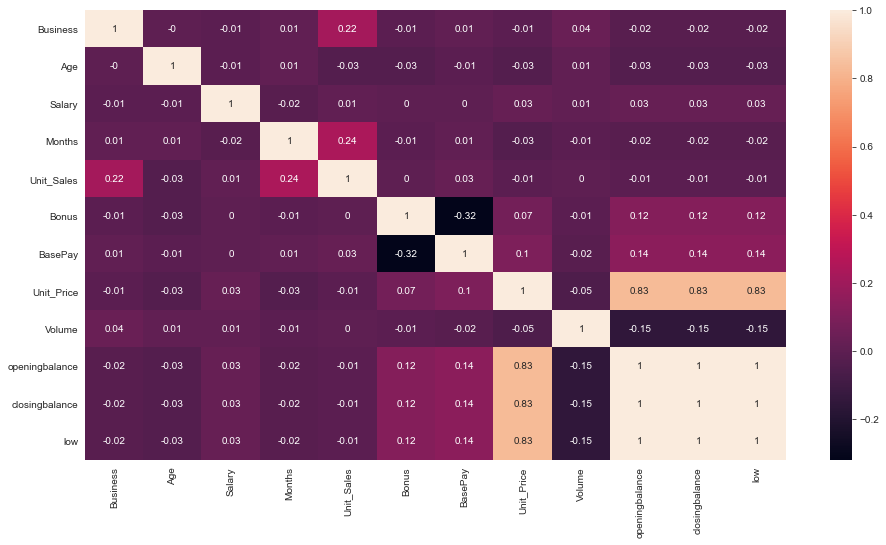

In [ ]:
corr_matrix= df.corr().round(2)
sns.heatmap(data=corr_matrix,annot=True)

#Inference : 
#1. Features like openingbalance , closingbalance and low are highly correlated so it will be best to drop the redundant columns as else we will  just load the  system with redundant data 
#2. No major correlation is found between the independent variables (all variables except Salary which is a dependent variable)



In [ ]:
# dropping the redundant columns 'closingbalance','low' as the correlation is high and we are just loading the processing

df.drop(['closingbalance','low'] , axis=1 , inplace=True)

In [ ]:
df.info()

#Inference: The redundant columns are not avaialble now / dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5049 non-null   object 
 1   Business        5049 non-null   int64  
 2   Age             5049 non-null   int64  
 3   Salary          5049 non-null   float64
 4   Dependancies    5049 non-null   object 
 5   Months          5049 non-null   int64  
 6   Calls           5049 non-null   object 
 7   Type            5049 non-null   object 
 8   Billing         5049 non-null   object 
 9   Unit_Sales      5049 non-null   float64
 10  Total_Sales     5049 non-null   object 
 11  Rating          5049 non-null   object 
 12  Bonus           5049 non-null   float64
 13  BasePay         5049 non-null   float64
 14  Unit_Price      5049 non-null   float64
 15  Volume          5049 non-null   int64  
 16  openingbalance  5049 non-null   float64
dtypes: float64(6), int64(4), object(7

<AxesSubplot:>

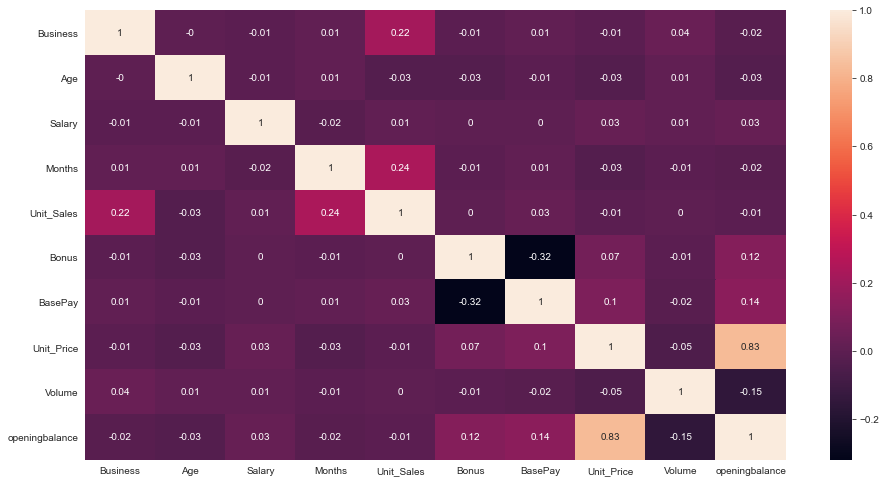

In [ ]:
# Check for the correlation matrix again
corr_matrix1= df.corr().round(2)
sns.heatmap(data=corr_matrix1,annot=True)

#Inference : The only highly correlated featutres are Unit_Price and OpeningBalance .

<AxesSubplot:>

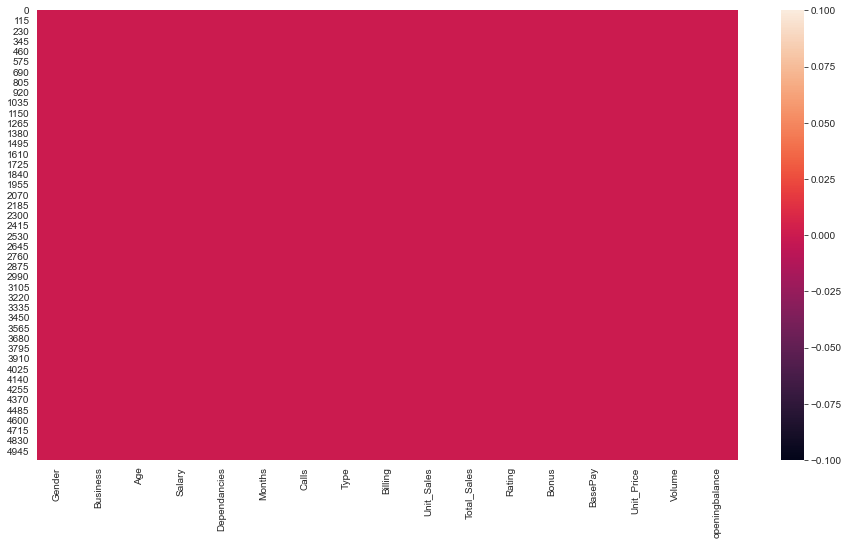

In [ ]:
# heatmap to find null values in the columns

sns.heatmap(df.isnull())

#Inference : No null values found

# Check for Outliers

In [ ]:
#Age 

<AxesSubplot:>

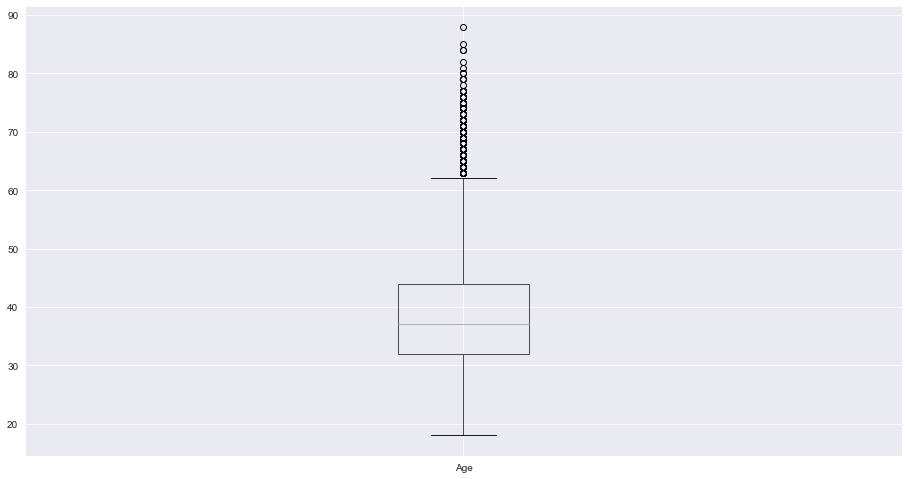

In [ ]:
df.boxplot("Age")
#Inference : Outliers found

In [ ]:
q1_age = df['Age'].describe()[4]
q3_age = df['Age'].describe()[6]
IQR_age = q3_age - q1_age
IQR_age

12.0

In [ ]:
# calculate upperwhisker
upperwhisker_age = (q3_age + (1.5*IQR_age)).astype(int)
upperwhisker_age


62

In [ ]:
# calculate lowerwhisker
lowerwhisker_age = (q1_age - (1.5*IQR_age)).astype(int)
lowerwhisker_age

14

In [ ]:
# identify all the outliers in age column less than lowerwhisker value
out_ageL = len (df[df['Age'] < lowerwhisker_age]['Age'])
out_ageL

0

In [ ]:
# identify all the outliers in age column more than upperwhisker value
df[df['Age'] > upperwhisker_age]['Age']

58      66
85      75
104     65
158     73
181     65
        ..
4931    81
4966    64
5000    68
5020    68
5038    63
Name: Age, Length: 183, dtype: int64

In [ ]:
out_age = len (df[df['Age'] > upperwhisker_age]['Age'])
out_age

183

In [ ]:
#If percent is more than 0.3% we need to handle the outlier
percent_age = round((out_age/df.shape[0])*100 , 2)
percent_age
# Inference : If percent is more than 0.3% we need to handle the outlier . In this case its 3.62 % so we need to handle the outlier

3.62

In [ ]:
#Replace the outliers with the upperwhisker 
df['Age'] = np.where(df['Age'] > upperwhisker_age , upperwhisker_age , df['Age'] )

<AxesSubplot:>

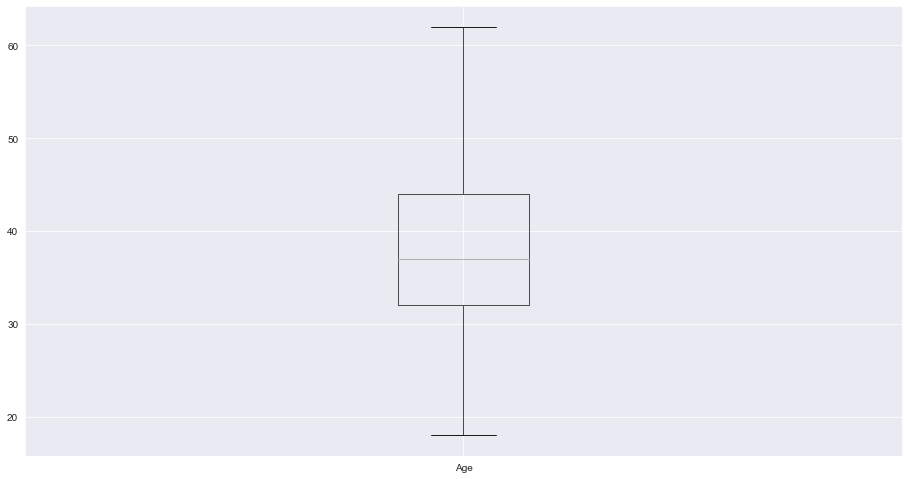

In [ ]:
df.boxplot("Age")
#Inference : Outliers are handled

In [ ]:
#Month

<AxesSubplot:>

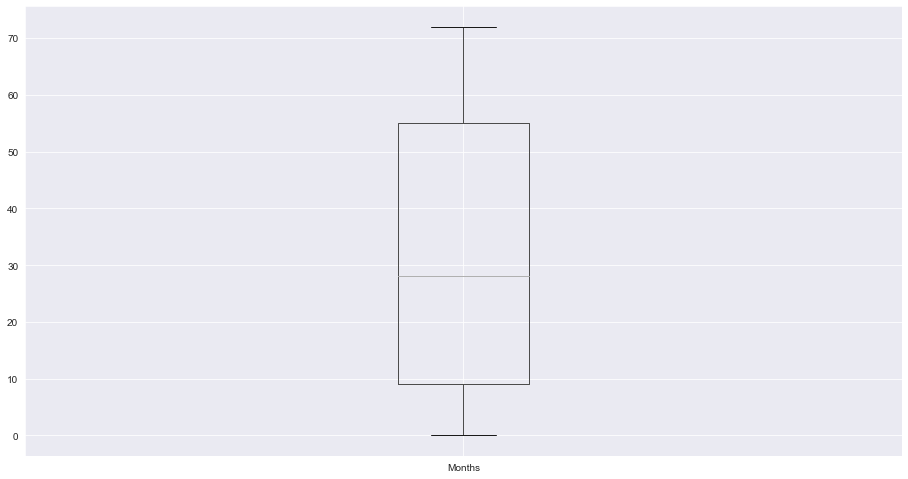

In [ ]:
df.boxplot("Months")
#Inference: No outlier found

In [ ]:
#Salary

<AxesSubplot:>

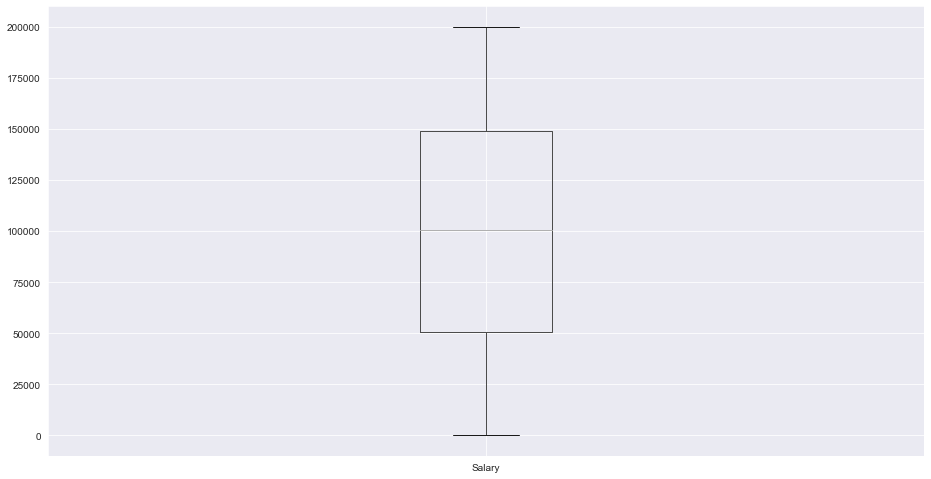

In [ ]:
df.boxplot("Salary")
#Inference: No outlier found

In [ ]:
#Unit_Sales

<AxesSubplot:>

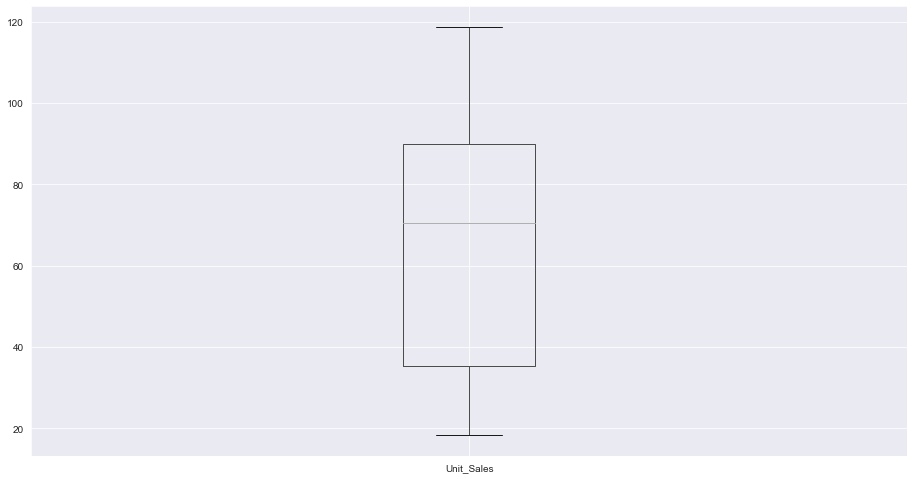

In [ ]:
df.boxplot("Unit_Sales")
#Inference: No outlier found

In [ ]:
#Bonus

<AxesSubplot:>

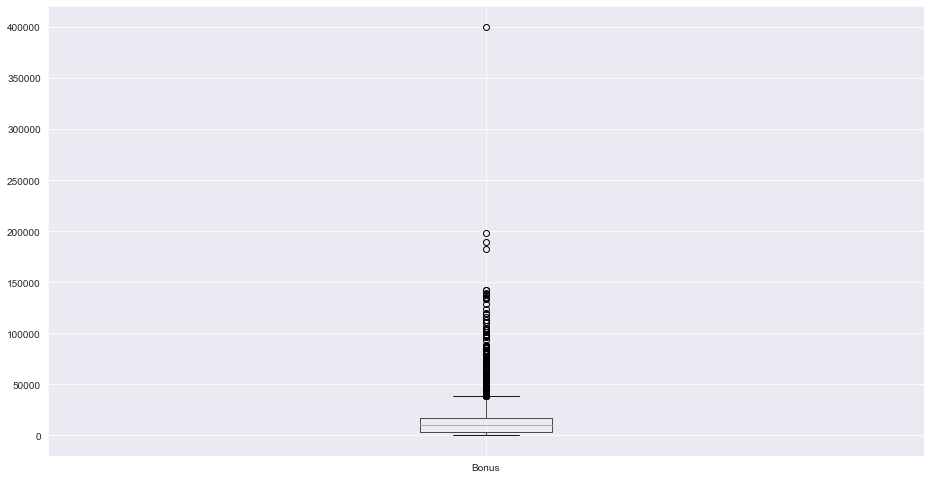

In [ ]:
df.boxplot("Bonus")
#Inference: Outlier found

In [ ]:
q1_Bonus = df['Bonus'].describe()[4]
q3_Bonus = df['Bonus'].describe()[6]
IQR_Bonus = q3_Bonus - q1_Bonus
IQR_Bonus

14105.03

In [ ]:
# calculate upperwhisker
upperwhisker_Bonus = (q3_Bonus + (1.5*IQR_Bonus)).astype(int)
upperwhisker_Bonus

38334

In [ ]:
# calculate lowerwhisker
lowerwhisker_Bonus = (q1_Bonus - (1.5*IQR_Bonus)).astype(int)
lowerwhisker_Bonus

-18085

In [ ]:
out_BonusL = len (df[df['Bonus'] < lowerwhisker_Bonus]['Bonus'])
out_BonusL

0

In [ ]:
# identify all the outliers
df[df['Bonus'] > upperwhisker_age]['Bonus']

0       400184.25
1       137811.38
2        16452.60
3       198306.90
4       182234.59
          ...    
5044      4773.17
5045     17063.77
5046     17959.69
5047      6462.36
5048     10676.41
Name: Bonus, Length: 4267, dtype: float64

In [ ]:
out_Bonus = len (df[df['Bonus'] > upperwhisker_age]['Bonus'])
out_Bonus

4267

In [ ]:
#If percent is more than 0.3% we need to handle the outlier
percent_Bonus = round((out_Bonus/df.shape[0])*100 , 2)
percent_Bonus
# Inference :  If percent is more than 0.3% we need to handle the outlier . In this case its 84.51 % so we have to handle the outlier

84.51

In [ ]:
df['Bonus'] = np.where(df['Bonus'] > upperwhisker_Bonus , upperwhisker_Bonus , df['Bonus'] )

<AxesSubplot:>

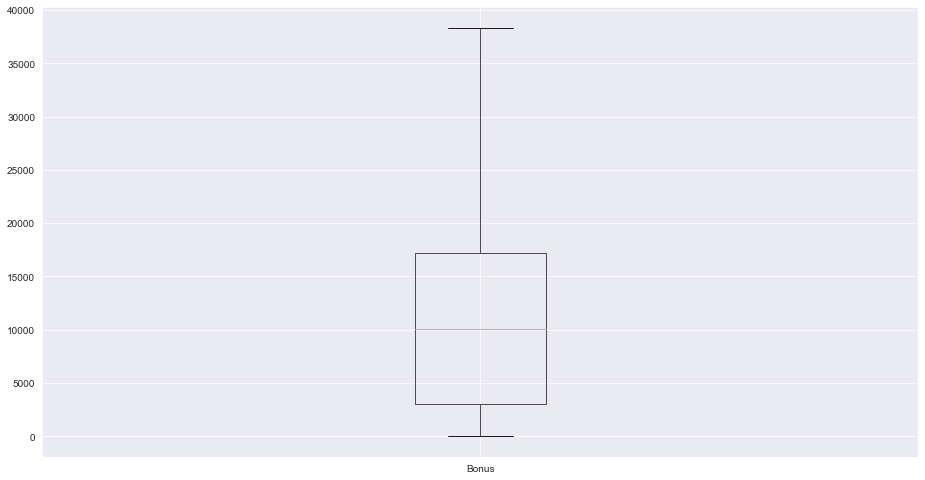

In [ ]:
df.boxplot("Bonus")
#Inference: Outlier is handled

In [ ]:
#BasePay

<AxesSubplot:>

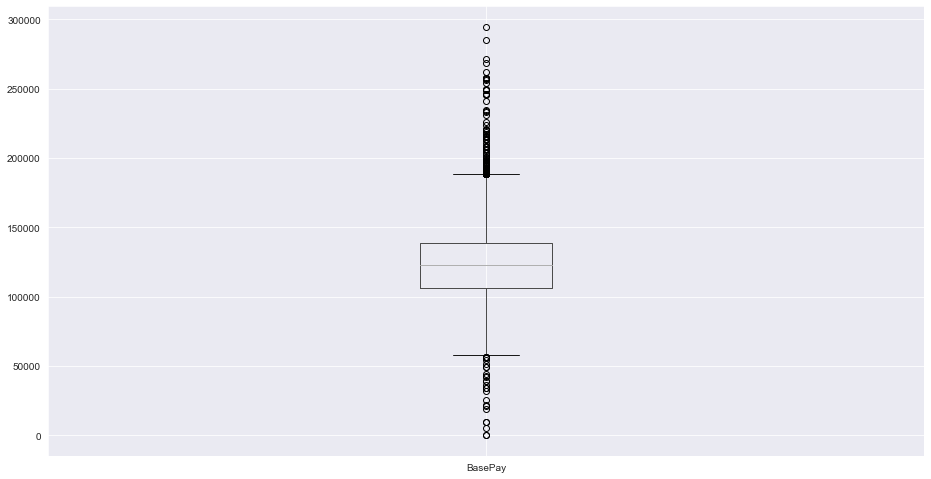

In [ ]:
df.boxplot("BasePay")
#Inference: Outlier found

In [ ]:
q1_BasePay = df['BasePay'].describe()[4]
q3_BasePay = df['BasePay'].describe()[6]
IQR_BasePay = q3_BasePay - q1_BasePay
IQR_BasePay

32919.979999999996

In [ ]:

# calculate upperwhisker
upperwhisker_BasePay = (q3_BasePay + (1.5*IQR_BasePay)).astype(int)
upperwhisker_BasePay

188234

In [ ]:
# calculate lowerwhisker
lowerwhisker_BasePay = (q1_BasePay - (1.5*IQR_BasePay)).astype(int)
lowerwhisker_BasePay

56554

In [ ]:
out_BasePayL = len (df[df['BasePay'] < lowerwhisker_BasePay]['BasePay'])
out_BasePayL


26

In [ ]:
#If percent is more than 0.3% we need to handle the outlier
percent_BasePayL = round((out_BasePayL/df.shape[0])*100 , 2)
percent_BasePayL

0.51

In [ ]:
df['BasePay'] = np.where(df['BasePay'] < lowerwhisker_BasePay , lowerwhisker_BasePay , df['BasePay'] )

In [ ]:
# identify all the outliers in age column
df[df['BasePay'] > upperwhisker_BasePay]['BasePay']


out_BasePay = len (df[df['BasePay'] > upperwhisker_BasePay]['BasePay'])
#out_BasePay


#If percent is more than 0.3% we need to handle the outlier
percent_BasePay = round((out_BasePay/df.shape[0])*100 , 2)
percent_BasePay
# Inference :  If percent is more than 0.3% we need to handle the outlier . 

df['BasePay'] = np.where(df['BasePay'] > upperwhisker_BasePay , upperwhisker_BasePay , df['BasePay'] )

<AxesSubplot:>

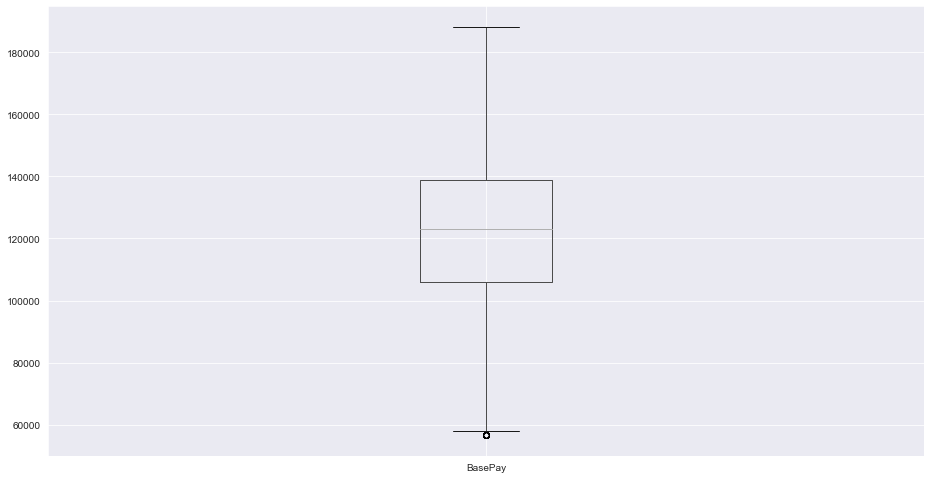

In [ ]:
df.boxplot("BasePay")

<AxesSubplot:>

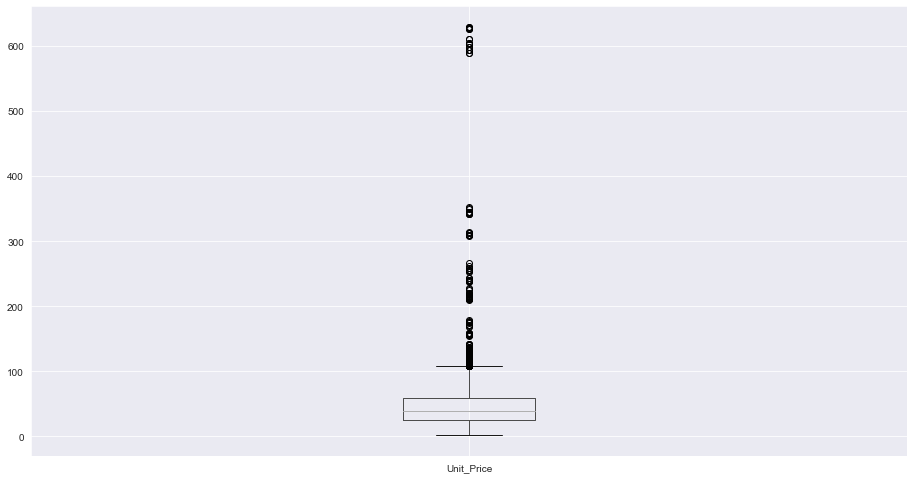

In [ ]:
df.boxplot("Unit_Price")

In [ ]:
q1_Unit_Price = df['Unit_Price'].describe()[4]
q3_Unit_Price = df['Unit_Price'].describe()[6]
IQR_Unit_Price = q3_Unit_Price - q1_Unit_Price
IQR_Unit_Price


32.83

In [ ]:
# calculate upperwhisker
upperwhisker_Unit_Price = (q3_Unit_Price + (1.5*IQR_Unit_Price)).astype(int)
upperwhisker_Unit_Price

107

In [ ]:
# calculate lowerwhisker
lowerwhisker_Unit_Price = (q1_Unit_Price - (1.5*IQR_Unit_Price)).astype(int)
lowerwhisker_Unit_Price

-23

In [ ]:
out_Unit_PriceL = len (df[df['Unit_Price'] < lowerwhisker_Unit_Price]['Unit_Price'])
out_Unit_PriceL


0

In [ ]:
# identify all the outliers in age column
df[df['Unit_Price'] > upperwhisker_Unit_Price]['Unit_Price']


out_Unit_Price = len (df[df['Unit_Price'] > upperwhisker_Unit_Price]['Unit_Price'])
#out_Unit_Price


#If percent is more than 0.3% we need to handle the outlier
percent_Unit_Price = round((out_Unit_Price/df.shape[0])*100 , 2)
percent_Unit_Price
# Inference :  If percent is more than 0.3% we need to handle the outlier . 

df['Unit_Price'] = np.where(df['Unit_Price'] > upperwhisker_Unit_Price , upperwhisker_Unit_Price , df['Unit_Price'] )

<AxesSubplot:>

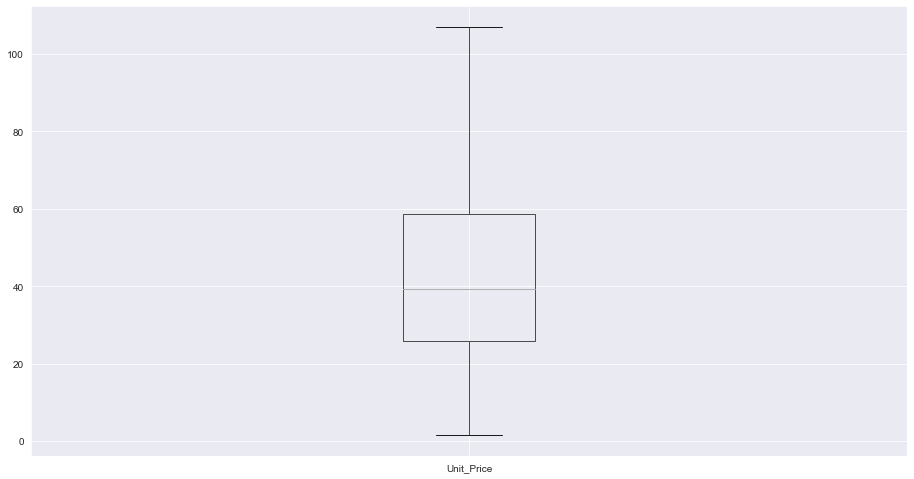

In [ ]:
df.boxplot("Unit_Price")

<AxesSubplot:>

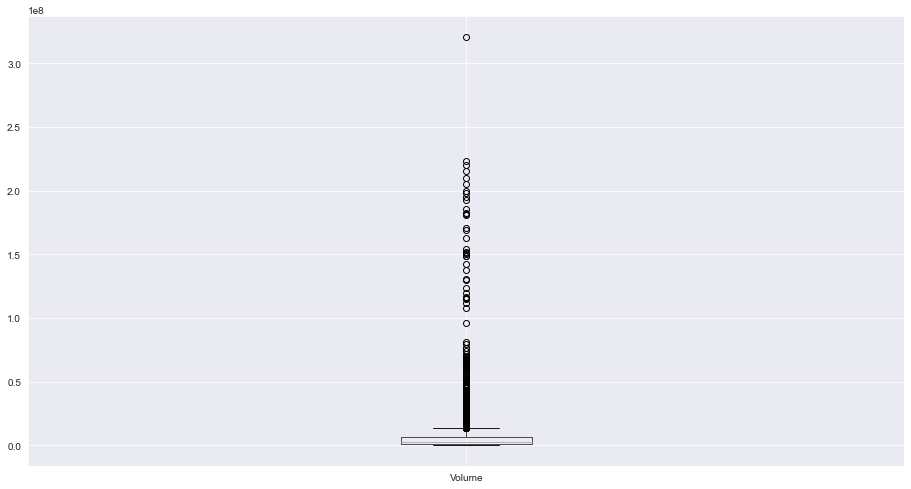

In [ ]:
df.boxplot("Volume")

In [ ]:
q1_Volume = df['Volume'].describe()[4]
q3_Volume = df['Volume'].describe()[6]
IQR_Volume = q3_Volume - q1_Volume
IQR_Volume

4923400.0

In [ ]:
# calculate upperwhisker
upperwhisker_Volume = (q3_Volume + (1.5*IQR_Volume)).astype(int)
upperwhisker_Volume

13590200

In [ ]:
# calculate lowerwhisker
lowerwhisker_Volume = (q1_Volume - (1.5*IQR_Volume)).astype(int)
lowerwhisker_Volume

-6103400

In [ ]:
out_VolumeL = len (df[df['Volume'] < lowerwhisker_Volume]['Volume'])
out_VolumeL

0

In [ ]:
# identify all the outliers in age column
df[df['Volume'] > upperwhisker_Volume]['Volume']


out_Volume = len (df[df['Volume'] > upperwhisker_Volume]['Volume'])
#out_Unit_Price


#If percent is more than 0.3% we need to handle the outlier
percent_Volume = round((out_Volume/df.shape[0])*100 , 2)
percent_Volume
# Inference :  If percent is more than 0.3% we need to handle the outlier . 
df['Volume'] = np.where(df['Volume'] > upperwhisker_Volume , upperwhisker_Volume, df['Volume'] )

<AxesSubplot:>

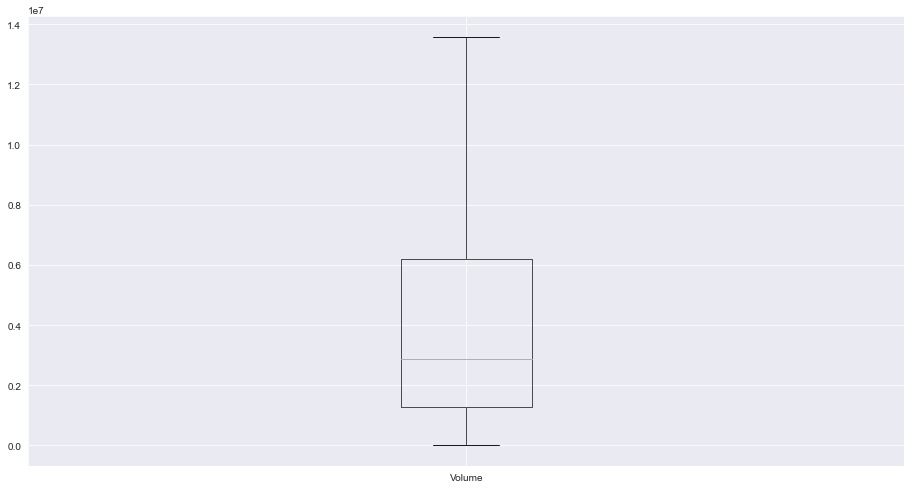

In [ ]:
df.boxplot("Volume")

<AxesSubplot:>

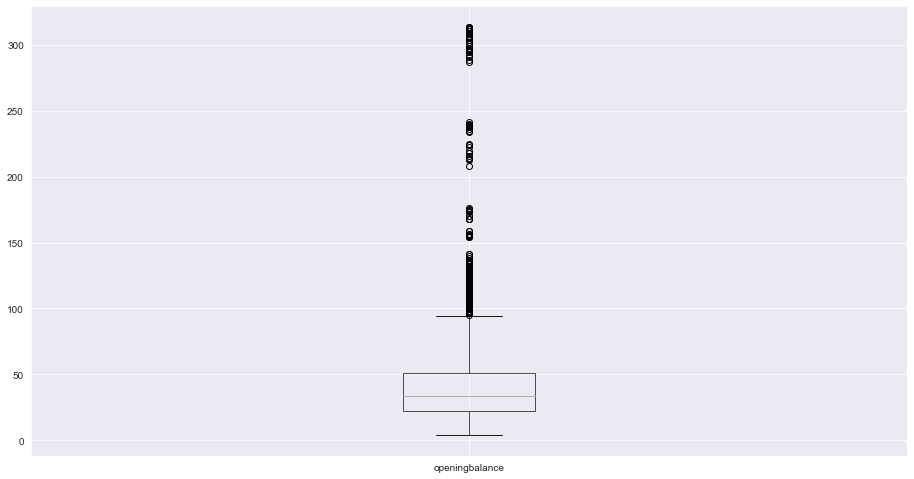

In [ ]:
df.boxplot("openingbalance")

In [ ]:
q1_openingbalance = df['openingbalance'].describe()[4]
q3_openingbalance = df['openingbalance'].describe()[6]
IQR_openingbalance = q3_openingbalance - q1_openingbalance
IQR_openingbalance

29.150001

In [ ]:
# calculate upperwhisker
upperwhisker_openingbalance = (q3_openingbalance + (1.5*IQR_openingbalance)).astype(int)
upperwhisker_openingbalance

94

In [ ]:
# calculate lowerwhisker
lowerwhisker_openingbalance = (q1_openingbalance - (1.5*IQR_openingbalance)).astype(int)
lowerwhisker_openingbalance

-21

In [ ]:
out_openingbalanceL = len (df[df['openingbalance'] < lowerwhisker_openingbalance]['openingbalance'])
out_openingbalanceL

0

In [ ]:
# identify all the outliers in age column
df[df['openingbalance'] > upperwhisker_openingbalance]['openingbalance']


out_openingbalance = len (df[df['openingbalance'] > upperwhisker_openingbalance]['openingbalance'])
out_openingbalance






401

In [ ]:
#If percent is more than 0.3% we need to handle the outlier
percent_openingbalance = round((out_openingbalance/df.shape[0])*100 , 2)
percent_openingbalance
# Inference :  If percent is more than 0.3% we need to handle the outlier . 

7.94

In [ ]:
df['openingbalance'] = np.where(df['openingbalance'] > upperwhisker_openingbalance , upperwhisker_openingbalance, df['openingbalance'] )

<AxesSubplot:>

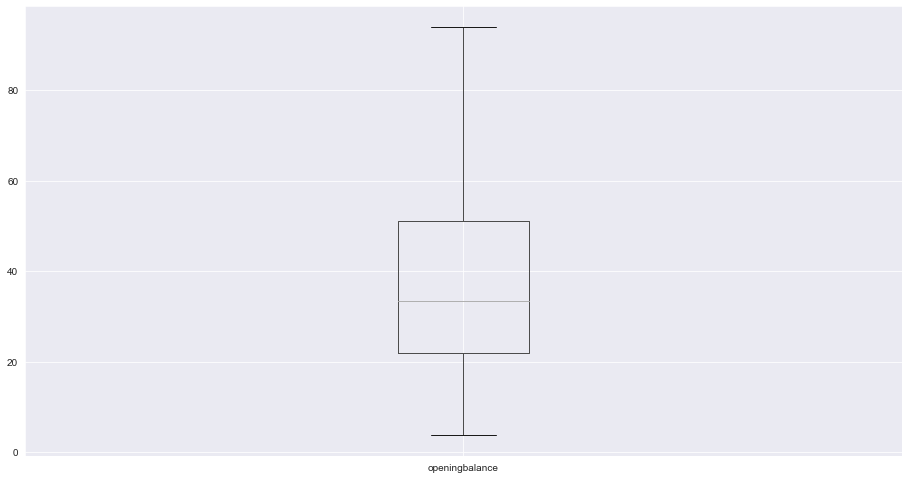

In [ ]:
df.boxplot("openingbalance")

# Feature Engineering

In [ ]:
# Convert the "Gender" column into a categorical data and drop the female column as with Male column we can know F/M . 
#Using get_dummies which is equivalent to One hot encoding

gender = pd.get_dummies(df['Gender'], drop_first=True)
gender.head(5)

,Male
0,0
1,1
2,1
3,1
4,0


In [ ]:
# Convert the "Type" column into a categorical data and drop the month to month column as with One year and Two year column we can know whether the type in month to month or not
#Using get_dummies which is equivalent to One hot encoding

Type = pd.get_dummies(df['Type'], drop_first=True)
Type.head(5)

,One year,Two year
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


In [ ]:
df.head()

,Gender,Business,Age,Salary,Dependancies,Months,Calls,Type,Billing,Unit_Sales,Total_Sales,Rating,Bonus,BasePay,Unit_Price,Volume,openingbalance
0,Female,0,42,101348.88,No,1,No,Month-to-month,Yes,29.85,29.85,No,38334.0,167411.18,107.0,2163600,94.0
1,Male,0,41,112542.58,No,34,Yes,One year,No,56.95,1889.5,No,38334.0,155966.02,107.0,2386400,94.0
2,Male,0,42,113931.57,No,2,Yes,Month-to-month,Yes,53.85,108.15,Yes,16452.6,188234.00,107.0,2489500,94.0
3,Male,0,39,93826.63,No,45,No,One year,No,42.30,1840.75,No,38334.0,77916.00,107.0,2006300,94.0
4,Female,0,43,79084.10,No,2,Yes,Month-to-month,Yes,70.70,151.65,Yes,38334.0,134401.60,107.0,1408600,94.0


In [ ]:
# Replace the Text based  Binary data to 0/1

In [ ]:
df.Calls.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True )
df.Billing.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True )
df.Rating.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True )
df.Dependancies.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True )


In [ ]:
df.head()

,Gender,Business,Age,Salary,Dependancies,Months,Calls,Type,Billing,Unit_Sales,Total_Sales,Rating,Bonus,BasePay,Unit_Price,Volume,openingbalance
0,Female,0,42,101348.88,0,1,0,Month-to-month,1,29.85,29.85,0,38334.0,167411.18,107.0,2163600,94.0
1,Male,0,41,112542.58,0,34,1,One year,0,56.95,1889.5,0,38334.0,155966.02,107.0,2386400,94.0
2,Male,0,42,113931.57,0,2,1,Month-to-month,1,53.85,108.15,1,16452.6,188234.00,107.0,2489500,94.0
3,Male,0,39,93826.63,0,45,0,One year,0,42.30,1840.75,0,38334.0,77916.00,107.0,2006300,94.0
4,Female,0,43,79084.10,0,2,1,Month-to-month,1,70.70,151.65,1,38334.0,134401.60,107.0,1408600,94.0


In [ ]:
# Concat the new columns of Gender and Type to the dataset

df2 = pd.concat([df,gender,Type],axis=1)
df2.head(5)

,Gender,Business,Age,Salary,Dependancies,Months,Calls,Type,Billing,Unit_Sales,Total_Sales,Rating,Bonus,BasePay,Unit_Price,Volume,openingbalance,Male,One year,Two year
0,Female,0,42,101348.88,0,1,0,Month-to-month,1,29.85,29.85,0,38334.0,167411.18,107.0,2163600,94.0,0,0,0
1,Male,0,41,112542.58,0,34,1,One year,0,56.95,1889.5,0,38334.0,155966.02,107.0,2386400,94.0,1,1,0
2,Male,0,42,113931.57,0,2,1,Month-to-month,1,53.85,108.15,1,16452.6,188234.00,107.0,2489500,94.0,1,0,0
3,Male,0,39,93826.63,0,45,0,One year,0,42.30,1840.75,0,38334.0,77916.00,107.0,2006300,94.0,1,1,0
4,Female,0,43,79084.10,0,2,1,Month-to-month,1,70.70,151.65,1,38334.0,134401.60,107.0,1408600,94.0,0,0,0


In [ ]:
#Drop the old columns of Gender and Type - Text based  
df2.drop(['Gender','Type'], axis=1 , inplace=True)

In [ ]:
df2.head()

,Business,Age,Salary,Dependancies,Months,Calls,Billing,Unit_Sales,Total_Sales,Rating,Bonus,BasePay,Unit_Price,Volume,openingbalance,Male,One year,Two year
0,0,42,101348.88,0,1,0,1,29.85,29.85,0,38334.0,167411.18,107.0,2163600,94.0,0,0,0
1,0,41,112542.58,0,34,1,0,56.95,1889.5,0,38334.0,155966.02,107.0,2386400,94.0,1,1,0
2,0,42,113931.57,0,2,1,1,53.85,108.15,1,16452.6,188234.00,107.0,2489500,94.0,1,0,0
3,0,39,93826.63,0,45,0,0,42.30,1840.75,0,38334.0,77916.00,107.0,2006300,94.0,1,1,0
4,0,43,79084.10,0,2,1,1,70.70,151.65,1,38334.0,134401.60,107.0,1408600,94.0,0,0,0


# Visualisation of Data

<AxesSubplot:xlabel='Business', ylabel='count'>

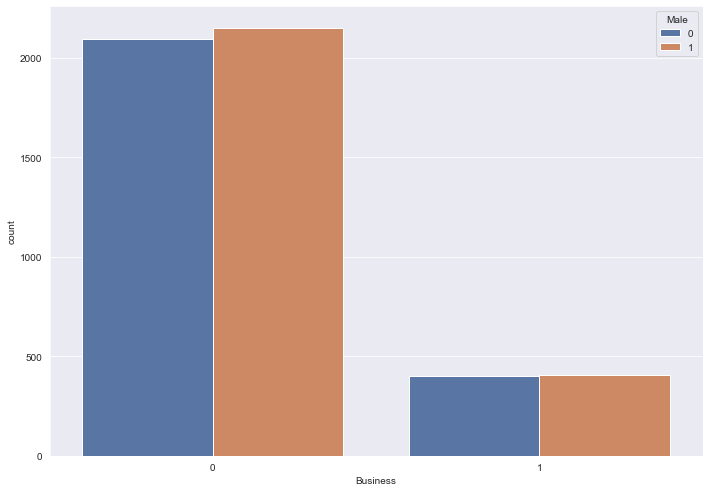

In [ ]:
sns.set({'figure.figsize':(11.7,8.27)})

sns.countplot(x="Business", hue="Male", data=df2)

# Inference : Most of the employees do not have their business and almost Equal number of male and female employee have business of their own

<AxesSubplot:xlabel='Male', ylabel='Age'>

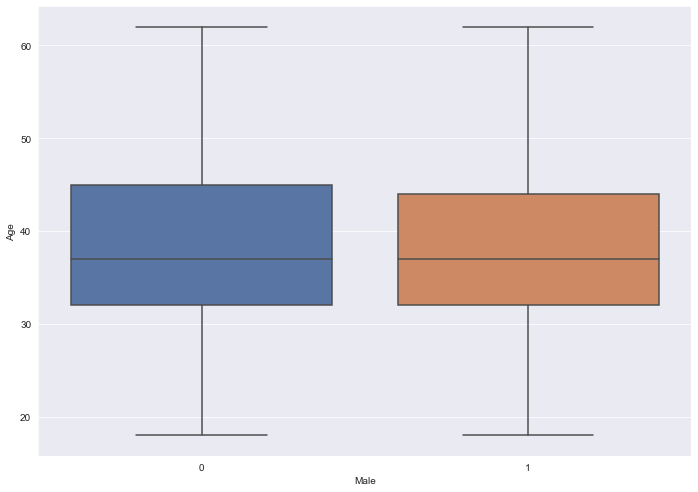

In [ ]:
# Using a box plot will be plotting for Male and age (check the outliers).
sns.boxplot(x="Male", y="Age", data= df2)
# Inference : Most of the employees are between the age bracket of  32 to 45 years 

<AxesSubplot:ylabel='Frequency'>

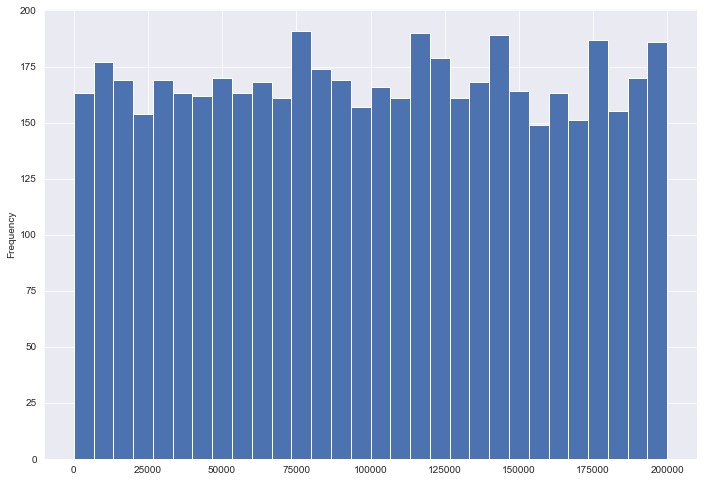

In [ ]:
#  Plot a graph for salary
df2["Salary"].plot.hist(bins=30)

#Inference: The salary is between 0 to 200000

<AxesSubplot:ylabel='Frequency'>

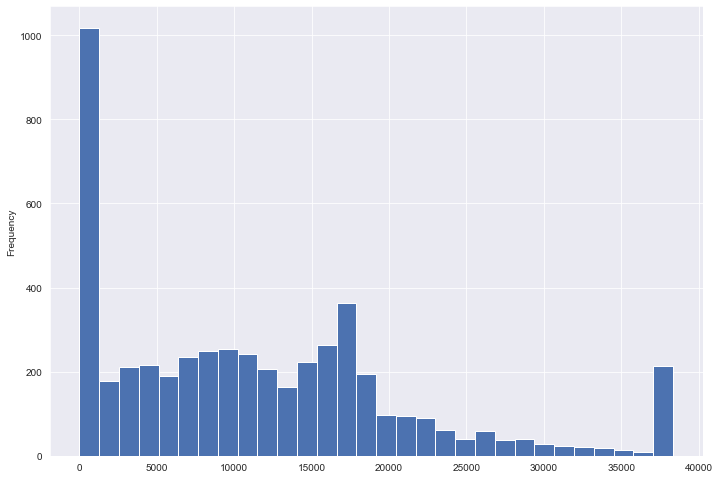

In [ ]:
#  Plot a graph for bonus
df2["Bonus"].plot.hist(bins=30)

#Inference: The bonus is between 0 to 370000

3

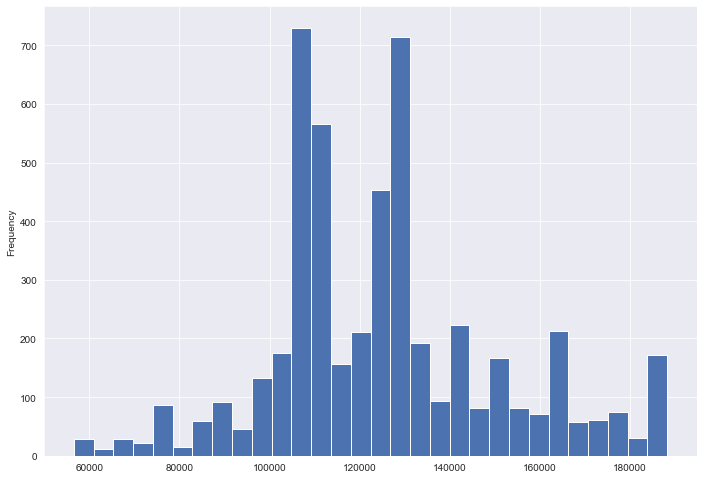

In [ ]:
#  Plot a graph for basepay
df2["BasePay"].plot.hist(bins=30)

3#Inference: The basepay is between 60000 to 180000

# Feature Scaling - Normalization

In [ ]:
# Convert the datatype of Total_Sales to Float
df2["Total_Sales"] = pd.to_numeric(df2["Total_Sales"], errors='coerce')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Business        5049 non-null   int64  
 1   Age             5049 non-null   int64  
 2   Salary          5049 non-null   float64
 3   Dependancies    5049 non-null   int64  
 4   Months          5049 non-null   int64  
 5   Calls           5049 non-null   int64  
 6   Billing         5049 non-null   int64  
 7   Unit_Sales      5049 non-null   float64
 8   Total_Sales     5041 non-null   float64
 9   Rating          5049 non-null   int64  
 10  Bonus           5049 non-null   float64
 11  BasePay         5049 non-null   float64
 12  Unit_Price      5049 non-null   float64
 13  Volume          5049 non-null   int64  
 14  openingbalance  5049 non-null   float64
 15  Male            5049 non-null   uint8  
 16  One year        5049 non-null   uint8  
 17  Two year        5049 non-null   u

In [ ]:
#Check for null values after the datatype conversion . 
df2.isnull().sum()

Business          0
Age               0
Salary            0
Dependancies      0
Months            0
Calls             0
Billing           0
Unit_Sales        0
Total_Sales       8
Rating            0
Bonus             0
BasePay           0
Unit_Price        0
Volume            0
openingbalance    0
Male              0
One year          0
Two year          0
dtype: int64

In [ ]:
#Replace the null values in 'Total_sales' column with the mean value.
df2["Total_Sales"].fillna(df2["Total_Sales"].mean(), inplace=True)

In [ ]:
# Check if null values are eliminated.
df2.isnull().sum()

Business          0
Age               0
Salary            0
Dependancies      0
Months            0
Calls             0
Billing           0
Unit_Sales        0
Total_Sales       0
Rating            0
Bonus             0
BasePay           0
Unit_Price        0
Volume            0
openingbalance    0
Male              0
One year          0
Two year          0
dtype: int64

In [ ]:
# Normalisation - Import Scaling library 
from sklearn.preprocessing import MinMaxScaler
scale= MinMaxScaler()

In [ ]:
#Normalise the dataset  - (range of all values between 0-1)

#set the rounding for the dataset to 4 decimal places
pd.options.display.float_format = "{:,.4f}".format

dfs=scale.fit_transform(df2)
df2= pd.DataFrame(dfs , columns= ['Business' , 'Age'  ,'Salary' ,'Dependancies','Months','Calls' ,'Billing' ,'Unit_Sales'  ,'Total_Sales' ,'Rating','Bonus','BasePay' ,'Unit_Price' ,'Volume' ,'openingbalance' ,'Male' , 'One year' ,'Two year' ])


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Business        5049 non-null   float64
 1   Age             5049 non-null   float64
 2   Salary          5049 non-null   float64
 3   Dependancies    5049 non-null   float64
 4   Months          5049 non-null   float64
 5   Calls           5049 non-null   float64
 6   Billing         5049 non-null   float64
 7   Unit_Sales      5049 non-null   float64
 8   Total_Sales     5049 non-null   float64
 9   Rating          5049 non-null   float64
 10  Bonus           5049 non-null   float64
 11  BasePay         5049 non-null   float64
 12  Unit_Price      5049 non-null   float64
 13  Volume          5049 non-null   float64
 14  openingbalance  5049 non-null   float64
 15  Male            5049 non-null   float64
 16  One year        5049 non-null   float64
 17  Two year        5049 non-null   f

In [ ]:
df2

,Business,Age,Salary,Dependancies,Months,Calls,Billing,Unit_Sales,Total_Sales,Rating,Bonus,BasePay,Unit_Price,Volume,openingbalance,Male,One year,Two year
0,0.0000,0.5455,0.5068,0.0000,0.0139,0.0000,1.0000,0.1154,0.0013,0.0000,1.0000,0.8419,1.0000,0.1592,1.0000,0.0000,0.0000,0.0000
1,0.0000,0.5227,0.5628,0.0000,0.4722,1.0000,0.0000,0.3851,0.2159,0.0000,1.0000,0.7550,1.0000,0.1756,1.0000,1.0000,1.0000,0.0000
2,0.0000,0.5455,0.5697,0.0000,0.0278,1.0000,1.0000,0.3542,0.0103,1.0000,0.4292,1.0000,1.0000,0.1832,1.0000,1.0000,0.0000,0.0000
3,0.0000,0.4773,0.4692,0.0000,0.6250,0.0000,0.0000,0.2393,0.2102,0.0000,1.0000,0.1622,1.0000,0.1476,1.0000,1.0000,1.0000,0.0000
4,0.0000,0.5682,0.3954,0.0000,0.0278,1.0000,1.0000,0.5219,0.0153,1.0000,1.0000,0.5912,1.0000,0.1036,1.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,0.0000,0.2727,0.7033,0.0000,0.3056,1.0000,1.0000,0.8592,0.2495,0.0000,0.1245,0.3760,0.4146,0.0429,0.4475,1.0000,0.0000,0.0000
5045,0.0000,0.2500,0.0236,0.0000,0.4861,1.0000,0.0000,0.6149,0.3251,0.0000,0.4451,0.3810,0.3600,0.1131,0.3899,0.0000,0.0000,0.0000
5046,0.0000,0.1591,0.0529,0.0000,0.0139,1.0000,0.0000,0.2677,0.0030,0.0000,0.4685,0.3750,0.1123,0.7238,0.1010,0.0000,0.0000,0.0000
5047,0.0000,0.1818,0.8984,0.0000,0.5417,1.0000,1.0000,0.5463,0.3130,0.0000,0.1686,0.4623,0.3168,0.4397,0.3161,1.0000,0.0000,0.0000


# Choosing the ML model 

In [ ]:
#import sys
#!{sys.executable} --version

In [ ]:
#!{sys.executable} -m pip install lazypredict --user


In [ ]:
# import necessary modules
import warnings
warnings.filterwarnings('ignore')
import time 
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

#warnings: Package to handle warnings and ‘ignore’ is used when we need to filter out all the warnings
#time: Package to handle time manipulation
#sklearn.model_selection.train_test_split:Used to split the dataset into train and split
#lazypredict:this is the package we gonna use for our analysis. In lazypredict.Supervised there are two main functions LazyClassifier for Classification and LazyRegressor for Regression .

In [ ]:
# load the  dataset
#set the rounding for the dataset to 4 decimal places
pd.options.display.float_format = "{:,.4f}".format

X1= df2.drop("Salary", axis=1)
Y1= df2["Salary"]

In [ ]:
X1

,Business,Age,Dependancies,Months,Calls,Billing,Unit_Sales,Total_Sales,Rating,Bonus,BasePay,Unit_Price,Volume,openingbalance,Male,One year,Two year
0,0.0000,0.5455,0.0000,0.0139,0.0000,1.0000,0.1154,0.0013,0.0000,1.0000,0.8419,1.0000,0.1592,1.0000,0.0000,0.0000,0.0000
1,0.0000,0.5227,0.0000,0.4722,1.0000,0.0000,0.3851,0.2159,0.0000,1.0000,0.7550,1.0000,0.1756,1.0000,1.0000,1.0000,0.0000
2,0.0000,0.5455,0.0000,0.0278,1.0000,1.0000,0.3542,0.0103,1.0000,0.4292,1.0000,1.0000,0.1832,1.0000,1.0000,0.0000,0.0000
3,0.0000,0.4773,0.0000,0.6250,0.0000,0.0000,0.2393,0.2102,0.0000,1.0000,0.1622,1.0000,0.1476,1.0000,1.0000,1.0000,0.0000
4,0.0000,0.5682,0.0000,0.0278,1.0000,1.0000,0.5219,0.0153,1.0000,1.0000,0.5912,1.0000,0.1036,1.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,0.0000,0.2727,0.0000,0.3056,1.0000,1.0000,0.8592,0.2495,0.0000,0.1245,0.3760,0.4146,0.0429,0.4475,1.0000,0.0000,0.0000
5045,0.0000,0.2500,0.0000,0.4861,1.0000,0.0000,0.6149,0.3251,0.0000,0.4451,0.3810,0.3600,0.1131,0.3899,0.0000,0.0000,0.0000
5046,0.0000,0.1591,0.0000,0.0139,1.0000,0.0000,0.2677,0.0030,0.0000,0.4685,0.3750,0.1123,0.7238,0.1010,0.0000,0.0000,0.0000
5047,0.0000,0.1818,0.0000,0.5417,1.0000,1.0000,0.5463,0.3130,0.0000,0.1686,0.4623,0.3168,0.4397,0.3161,1.0000,0.0000,0.0000


In [ ]:
Y1

0      0.5068
1      0.5628
2      0.5697
3      0.4692
4      0.3954
        ...  
5044   0.7033
5045   0.0236
5046   0.0529
5047   0.8984
5048   0.3875
Name: Salary, Length: 5049, dtype: float64

In [ ]:
# split the dataset 
X_train1, X_test1, Y_train1, Y_test1 =train_test_split(X1,Y1,test_size=0.2,random_state = 0)
regr=LazyRegressor(verbose=0,predictions=True)
#regr= LazyRegressor(verbose=0,ignore_warnings=True,custom_metric=None, predictions=True)

In [ ]:
# fit and train the model 
start_time_2=time.time()
models_r,predictions_r=regr.fit(X_train1, X_test1, Y_train1, Y_test1)
end_time_2=time.time()

100%|██████████| 42/42 [00:25<00:00,  1.64it/s]


In [ ]:
# to check which model did better on the  dataset
models_r

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
AdaBoostRegressor,-0.0138,0.0032,0.2855,0.2269
LassoLarsCV,-0.0179,-0.0007,0.2861,0.0740
LarsCV,-0.0179,-0.0007,0.2861,0.0710
ElasticNetCV,-0.0180,-0.0009,0.2861,0.1319
LassoCV,-0.0180,-0.0009,0.2861,0.1419
Lars,-0.0181,-0.0009,0.2861,0.0320
PoissonRegressor,-0.0181,-0.0010,0.2861,0.0189
BayesianRidge,-0.0183,-0.0011,0.2861,0.0280
TweedieRegressor,-0.0184,-0.0013,0.2862,0.0193


In [ ]:
# to check the predications for the models 
predictions_r

,AdaBoostRegressor,BaggingRegressor,BayesianRidge,DecisionTreeRegressor,DummyRegressor,ElasticNet,ElasticNetCV,ExtraTreeRegressor,ExtraTreesRegressor,GaussianProcessRegressor,...,RANSACRegressor,RandomForestRegressor,Ridge,RidgeCV,SGDRegressor,SVR,TransformedTargetRegressor,TweedieRegressor,XGBRegressor,LGBMRegressor
0,0.4973,0.6400,0.5020,0.8147,0.5038,0.5038,0.5042,0.2015,0.5510,0.5522,...,0.1414,0.5700,0.5035,0.5034,0.5245,0.5603,0.5035,0.5020,0.6609,0.6391
1,0.4901,0.5453,0.4848,0.3219,0.5038,0.5038,0.4879,0.1829,0.4420,0.4619,...,0.4028,0.4442,0.4622,0.4623,0.4635,0.4223,0.4622,0.4820,0.5077,0.4351
2,0.4951,0.4357,0.4824,0.2208,0.5038,0.5038,0.4866,0.3207,0.4230,0.0941,...,0.3722,0.4118,0.4474,0.4480,0.4914,0.4684,0.4474,0.4794,0.4154,0.5145
3,0.4973,0.4625,0.5038,0.7469,0.5038,0.5038,0.4940,0.7178,0.5869,0.6992,...,0.1107,0.5811,0.4941,0.4943,0.4995,0.5951,0.4940,0.5033,0.6085,0.5517
4,0.4972,0.3818,0.4944,0.7846,0.5038,0.5038,0.4873,0.9881,0.6532,0.6609,...,0.5064,0.5722,0.4885,0.4882,0.5168,0.6448,0.4885,0.4930,0.7407,0.6543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,0.5266,0.6594,0.5321,0.5704,0.5038,0.5038,0.5305,0.6294,0.5463,0.7048,...,-0.0481,0.5407,0.5582,0.5582,0.5560,0.6743,0.5582,0.5359,0.6002,0.5912
1006,0.4910,0.5121,0.4844,0.7992,0.5038,0.5038,0.4878,0.8815,0.5756,0.7481,...,0.8680,0.5692,0.4686,0.4687,0.4767,0.6361,0.4686,0.4820,0.5098,0.5331
1007,0.4910,0.2104,0.4936,0.3062,0.5038,0.5038,0.4869,0.0559,0.4422,0.5440,...,0.8368,0.4096,0.4980,0.4977,0.5315,0.3178,0.4981,0.4927,0.4236,0.4021
1008,0.4910,0.5632,0.5154,0.4080,0.5038,0.5038,0.5183,0.8015,0.6640,0.5609,...,-0.0523,0.5109,0.5239,0.5241,0.5474,0.5083,0.5239,0.5171,0.3586,0.5159


In [ ]:
#Inferences : 

#Using the lazypredict library it has following advantages as found on the internet once reasearched 
   #1.It applies preprocessing to the dataset.
    #(a) It imputes missing values using SimpleImputer (using the mean for numeric features & a constant ‘missing’ value for categorical ones). 
    #(b) It uses StandardScaler for numeric features , either OneHotEncoder or OrdinalEncoder for the categorical features (depending on the cardinality — number of unique values)

#Observation: The preprocessing advantage however was not what I experienced . 
   # 1.I had forgotten to change the type for "Total_Sales" features from Object to float,
   # when I applied the lazyregressor model  it  returned  empty result. 
   # 2.It is better to carryout preprocessing task at our side prior to applying the lazyregressor model for better performance

#2. It is easy to train all the models available in scikit-learn with a single line of code and get a list of models with the performance paramters.

#3. Based on the result list from Lazypredictor I select the below two models to work further for the below reason
    
     #RandomForest as my first model 
     #Multiple Linear Regression as my second model

   #(a) I am familiar with both these model among all the other models so it will be idle to implement. 
   #(b) I will also confirm/validate  whether the RMSE values available from Lazypredict for these two models are correct or not
   #(c) As per my research I found that generally Random Forest model works fairly well for many datasets , so it is an appropriate choice as my first model.
   #(d) LinearRegression will be my second model of choice as its RMSE value(0.2862) is better than RandomForest RMSE value(0.2907) 
        #Since , I am not sure if Lazypredict is using Multiple Linear Regression(which works for Non linear)  or Linear regression , so I select this as my second model.  
        #I couldn't find/establish a linear relationship between the salary and the other features which is a must for Linear Regression , so I select this as my second model assuming it is a multiple regression.
    
    

# Model 1: RandomForest ML Alogorithm 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error


In [ ]:
#x11= df2.drop("Total_Sales", axis=1)
#X1 = df2.drop("Salary", axis=1)
#Y1 = df2["Salary"]
#x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.20, random_state=0)

In [ ]:
Randomforestmodel= RandomForestRegressor()

In [ ]:
#Randomforestmodel.fit(x_train,y_train)

Randomforestmodel.fit(X_train1, Y_train1)

#Note: Using the same Train and Test set as used by Lazypredict to avoid any data  difference.

RandomForestRegressor()

In [ ]:
y_pred= Randomforestmodel.predict(X_test1)
y_pred

array([0.6312944 , 0.46693411, 0.47664132, ..., 0.39391683, 0.55315634,
       0.53344821])

In [ ]:
# Check the performance parameter
mse= mean_squared_error(Y_test1,y_pred)
rmse=np.sqrt(mse)
rmse

r2=r2_score(Y_test1,y_pred)

print("Model performance for testing set \n")
print("RMSE is {}" .format(rmse))
print ("R2 Score {}".format(r2))
print("\n")


#Inference : 
 #Lazypredict(RandomForest) RMSE :0.2907
 #RandomForest ML RMSE           :0.2911 
 #Both the values are almost similar 
    
 #Lazypredict(RandomForest) R2 :-0.0329
 #RandomForest ML R2           :-0.0363
 #Both the values are almost similar 
    


Model performance for testing set 

RMSE is 0.2911247310830165
R2 Score -0.0362543336735508




# Output Visualisation

In [ ]:
# Printing the tested and predicted values from RandomForest ML model
print_df = pd.DataFrame({'Actual Test Values' : Y_test1 , 'Predicted Values' : y_pred})
print_df

,Actual Test Values,Predicted Values
1115,0.4283,0.6313
1688,0.8031,0.4669
4633,0.7898,0.4766
4739,0.9805,0.5052
4552,0.6187,0.5170
...,...,...
122,0.7054,0.5372
4914,0.6943,0.5925
2540,0.4882,0.3939
4240,0.7174,0.5532


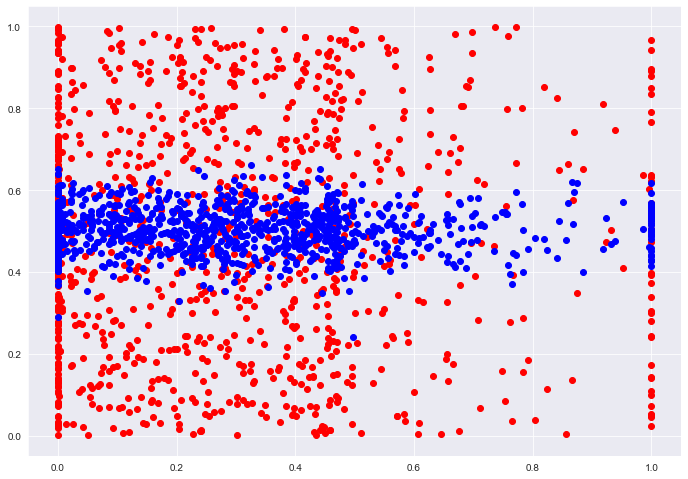

In [ ]:
#Visualise the result from Randomforest Model 


plt.scatter(X_test1['Bonus'],Y_test1, color='red')
plt.scatter(X_test1['Bonus'],y_pred, color='blue')

plt.show()

#Inference : 
#  The predictions are not very accurate wrt to the test data .Not the best model.
#  Will now try to implement Multiple Linear Regression to check if it will be a better model 


# Visual Plot on Predictons from Lazypredict and RandomForest ML model

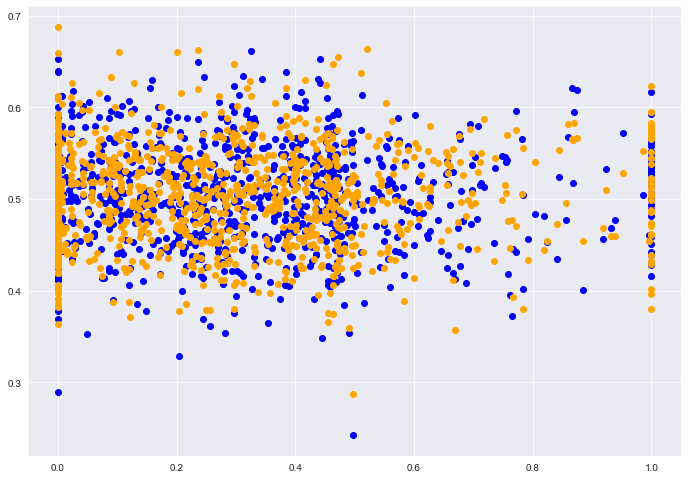

In [ ]:
# Visualise the predictions from LazrPredictor for Randomforest and from  Randomforest Model 



plt.scatter(X_test1['Bonus'],y_pred, color='blue')
plt.scatter(X_test1['Bonus'],predictions_r['RandomForestRegressor'], color='orange')


plt.show()

#Inference : The predictions from both the models Lazypredic(RandomForest) and RandomForest are similar .


# Model 2:  Multiple Linear Regression

In [ ]:
 #  Why do we select Multiple Linear Regression
    #1. It is a broader class of regression and is used for both linear and non linear regressions with multiple independent variables.
    #2. No major correlation is found between the independent variables in the dataset.
    

In [ ]:
# Train and fit the model
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train1, Y_train1)

LinearRegression()

In [ ]:
# Predicting with the model
y_pred_linear= regr.predict(X_test1)
y_pred_linear

array([0.50345438, 0.46217528, 0.44737075, ..., 0.49808438, 0.52391655,
       0.52755705])

In [ ]:
# Check the performance parameter
mse_linear= mean_squared_error(Y_test1,y_pred_linear)
rmse_linear=np.sqrt(mse_linear)
#rmse_linear
r2_linear=r2_score(Y_test1,y_pred_linear)

print("Model performance for testing set \n")
print("RMSE is {}" .format(rmse_linear))
print ("R2 Score {}".format(r2_linear))
print("\n")


#Inference : 
 #Lazypredict(LinearRegression) RMSE :0.2862
 # Multiple Regression ML RMSE       :0.2862
 #Both values are same 
    
#Lazypredict(LinearRegression) R2 :-0.0017
# Multiple Regression ML R2       :-0.0017 
 #Both values are same  
 

Model performance for testing set 

RMSE is 0.2862299119419362
R2 Score -0.0017011975222382958




# Output Visualisation

In [ ]:
# Printing the tested and predicted values from Multiple Regression ML model
print_df_linear = pd.DataFrame({'Actual Test Values' : Y_test1 , 'Predicted Values' : y_pred_linear})
print_df_linear

,Actual Test Values,Predicted Values
1115,0.4283,0.5035
1688,0.8031,0.4622
4633,0.7898,0.4474
4739,0.9805,0.4940
4552,0.6187,0.4885
...,...,...
122,0.7054,0.5582
4914,0.6943,0.4686
2540,0.4882,0.4981
4240,0.7174,0.5239


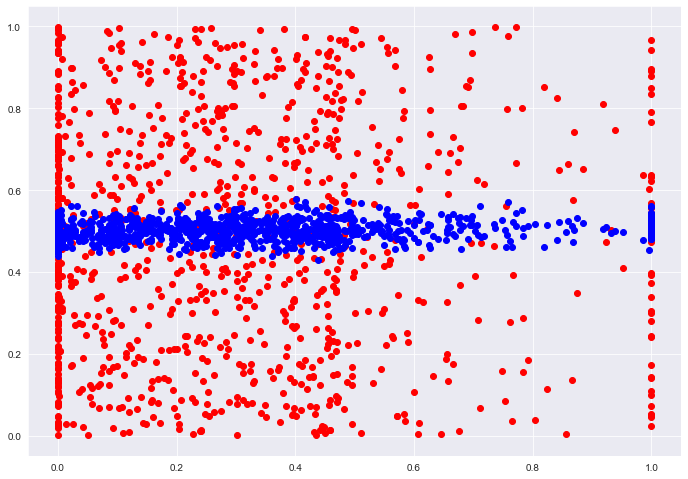

In [ ]:
#Visualise the result from Multiple Linear Regression Model 


plt.scatter(X_test1['Bonus'],Y_test1, color='red')
plt.scatter(X_test1['Bonus'],y_pred_linear, color='blue')

plt.show()

#Inference : The predictions are not very accurate wrt to the test data . Not the best model.
# Should try to implement the top 2 models as per lazypredict models result for better model performance.

# Visual Plot on predictons from Lazypredict and Multiple Regression ML model

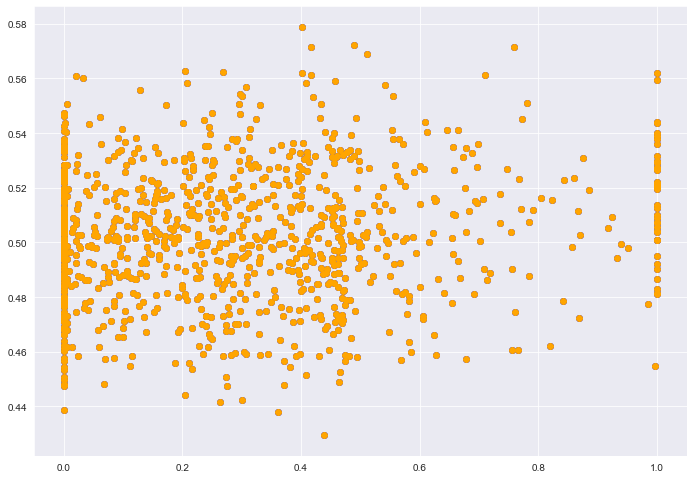

In [ ]:


plt.scatter(X_test1['Bonus'],y_pred_linear, color='blue')
plt.scatter(X_test1['Bonus'],predictions_r['LinearRegression'], color='orange')


plt.show()

#Inference : 
#1. The predictions made from Lazypredict(LinearRegression) and Multiple Linear Regression model is exact . 
#2. The RMSE values(0.2862) from Lazypredict and Multiple Linear model is same.

# Conclusion

In [ ]:
#1. Multiple Linear Regression model has a better model performance than the RandomForestModel on the given dataset.
#2. We can rely on Lazypredict to identify the best model and iterate further on the chosen model.
#3. My next challenge is to educate myself on the top 2 regressors  from the Lazypredictregressor result and execute them separately.
    #These models have the least RMSE value and the model prediction will  definitely be better and will be better models.

#End Of Project